In [ ]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns


# from ydata_profiling import ProfileReport

In [432]:
df = pd.read_parquet(r"C:\Users\HP\Desktop\FAO_CARBON_FOOTPRINT\fao_carbon_footprint\data\FAOSTAT\clean_data\full_country_dataset_v2_imputed.parquet")

In [433]:
pd.set_option('display.max_columns', None)
print(df.shape)

(12096, 78)


In [434]:
df.head(5)

,Area,Year,Area Code,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Emissions_(CO2)_kt,Drained_organic_soils_Net_stock_change_(C)_kt,Grassland_organic_soils_Area_ha,Grassland_organic_soils_Emissions_(CO2)_kt,Grassland_organic_soils_Net_stock_change_(C)_kt,Forestland_Area_1000_ha,Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt,Net_Forest_conversion_Area_1000_ha,Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x,Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt,Energy_Use_(Pre-_and_Post-Production)_Energy_Use_(Total)_TJ,Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x,Food_Household_Consumption_Energy_Use_(Total)_TJ,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x,Food_Packaging_Energy_Use_(Total)_TJ,Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x,Food_Processing_Energy_Use_(Total)_TJ,Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x,Food_Retail_Energy_Use_(Total)_TJ,Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x,Food_Transport_Energy_Use_(Total)_TJ,Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x,Pre-_and_Post-_Production_Energy_Use_(Total)_TJ,Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_y,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Drained_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,Emissions_on_agricultural_land_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt,Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y,Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt,Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_y,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_y,Food_Processing_Emissions_(CO2eq)_(AR5)_kt_y,Food_Retail_Emissions_(CO2eq)_(AR5)_kt_y,Food_Transport_Emissions_(CO2eq)_(AR5)_kt_y,Forest_fires_Emissions_(CO2eq)_(AR5)_kt,Forestland_Emissions_(CO2eq)_(AR5)_kt,Land_Use_change_Emissions_(CO2eq)_(AR5)_kt,Manure_Management_Emissions_(CO2eq)_(AR5)_kt,Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt,Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt
0,Armenia,1980,1.0,734.6265,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,250.194146,585.400799,7215.848159,NaN,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,0.228261,835.903219,7215.848159,79.589584,544.8665,250.1941,2997.3446,2.5811,25.8905,0.0,28.4716,1251.471,2161.4414,751.24,2107.216,NaN,0.0,0.0,354.5286,20.1313,73.3263,101.2014,36.2933,0.8903,76.3667,54.2254,64.0145,33.337,402.8795,54.2254,0.2283,835.9032,NaN,4.2975,82.7595,606.9

In [435]:
df.columns

Index(['Area', 'Year', 'Area Code', 'Total_Energy_Emissions_(CO2)_kt',
       'Total_Energy_Energy_use_in_agriculture_TJ',
       'Cropland_organic_soils_Area_ha',
       'Cropland_organic_soils_Emissions_(CO2)_kt',
       'Cropland_organic_soils_Net_stock_change_(C)_kt',
       'Drained_organic_soils_Area_ha',
       'Drained_organic_soils_Emissions_(CO2)_kt',
       'Drained_organic_soils_Net_stock_change_(C)_kt',
       'Grassland_organic_soils_Area_ha',
       'Grassland_organic_soils_Emissions_(CO2)_kt',
       'Grassland_organic_soils_Net_stock_change_(C)_kt',
       'Forestland_Area_1000_ha',
       'Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt',
       'Net_Forest_conversion_Area_1000_ha',
       'Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt',
       'Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x',
       'Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt',
       'Energy_Use_(Pre-_and_Post-Production)_Energy_Use_

In [436]:
#profile = ProfileReport(df, title="Full Country V2 Report", minimal= True, explorative=True)
#profile.to_notebook_iframe()

# Feature Ingenieering & Pre-Processing

## Eliminar columnas Iguales/duplicadas

### Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x y 

In [437]:
def diferencia_columnas(df, cols):
    return df[cols[0]] - df[cols[1]]

In [438]:
def eliminarYrenombrar(df, cols):
    
    # Cambia el nombre de la primera columna, eliminando los últimos 2 caracteres
    first_column = cols[0]
    new_name = first_column[:-2]
    df = df.rename(columns={first_column: new_name})
    
    # Elimina la segunda columna
    second_column = cols[1]
    df = df.drop(columns=[second_column])
    
    return df

In [439]:
cols = ["Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x", "Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000046
1        0.000046
2        0.000046
3        0.000046
4        0.000046
           ...   
12091   -0.000031
12092   -0.000034
12093   -0.000028
12094    0.000022
12095   -0.000023
Length: 12096, dtype: float64

In [440]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x y

In [441]:
cols = ["Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x", "Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12091   -0.000028
12092   -0.000015
12093    0.000044
12094   -0.000016
12095   -0.000003
Length: 12096, dtype: float64

In [442]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x y

In [443]:
cols = ["Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000015
1       -0.000015
2       -0.000015
3       -0.000015
4       -0.000015
           ...   
12091   -0.000035
12092   -0.000023
12093   -0.000007
12094   -0.000042
12095   -0.000039
Length: 12096, dtype: float64

In [444]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x y

In [445]:
cols = ["Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000037
1       -0.000037
2       -0.000037
3       -0.000037
4       -0.000037
           ...   
12091    0.000024
12092   -0.000006
12093    0.000037
12094   -0.000040
12095   -0.000012
Length: 12096, dtype: float64

In [446]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x y

In [447]:
cols = ["Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Processing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000039
1       -0.000039
2       -0.000039
3       -0.000039
4       -0.000039
           ...   
12091    0.000031
12092    0.000031
12093    0.000039
12094    0.000000
12095   -0.000018
Length: 12096, dtype: float64

In [448]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x y

In [449]:
cols = ["Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Retail_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
12091    0.000025
12092   -0.000039
12093   -0.000036
12094    0.000006
12095    0.000016
Length: 12096, dtype: float64

In [450]:
df = eliminarYrenombrar(df, cols)

### Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x y

In [451]:
cols = ["Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Transport_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000003
1        0.000003
2        0.000003
3        0.000003
4        0.000003
           ...   
12091   -0.000014
12092   -0.000036
12093   -0.000027
12094   -0.000004
12095   -0.000004
Length: 12096, dtype: float64

In [452]:
df = eliminarYrenombrar(df, cols)

### Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x y

In [453]:
cols = ["Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x", "Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000039
1       -0.000039
2       -0.000039
3       -0.000039
4       -0.000039
           ...   
12091    0.000023
12092    0.000002
12093   -0.000004
12094   -0.000007
12095   -0.000035
Length: 12096, dtype: float64

In [454]:
df = eliminarYrenombrar(df, cols)

### Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x y


In [455]:
cols = ['Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x','Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y',]
diferencia_columnas(df, cols)

0        0.000019
1        0.000019
2        0.000019
3        0.000019
4        0.000019
           ...   
12091   -0.000005
12092   -0.000019
12093    0.000018
12094    0.000019
12095   -0.000018
Length: 12096, dtype: float64

In [456]:
df = eliminarYrenombrar(df, cols)

In [457]:
df.shape

(12096, 69)

## Totales, agrupar y sumar columnas

### 1.Total_Energy_Emissions_CO2_kt

In [458]:
def sum_and_print_columns(df, cols, new_col_name):
    df[new_col_name] = df[cols].sum(axis=1)
    print(f"Nueva columna '{new_col_name}':")
    # print(df[[new_col_name]])
    return df

In [459]:
cols = ['Total_Energy_Emissions_(CO2)_kt',
        'Total_Energy_Emissions_(CH4_CO2eq)_kt',
        'Total_Energy_Emissions_(N2O_CO2eq)_kt']

new_col_name1 = 'Total_Energy_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name1)

# dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Energy_Emissions_CO2_kt']]

Nueva columna 'Total_Energy_Emissions_CO2_kt':


,Total_Energy_Emissions_CO2_kt
0,740.2100
1,740.2100
2,740.2100
3,740.2100
4,740.2100
...,...
12091,258071.0304
12092,256804.3351
12093,257077.5072
12094,248882.1550


### 2.Total_Organic_Soils_Emissions_CO2eq_kt

In [460]:
cols = ['Cropland_organic_soils_Emissions_(CO2)_kt',
    'Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt',
    'Drained_organic_soils_Emissions_(CO2)_kt',
    'Drained_organic_soils_Emissions_(N2O_CO2eq)_kt',
    'Drained_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
    'Grassland_organic_soils_Emissions_(CO2)_kt',
    'Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt']

new_col_name2 = 'Total_Organic_Soils_Emissions_CO2eq_kt'

df = sum_and_print_columns(df, cols, new_col_name2)

# dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
#df = df.drop(cols, axis=1)

# Resultado
df[['Total_Organic_Soils_Emissions_CO2eq_kt']]

Nueva columna 'Total_Organic_Soils_Emissions_CO2eq_kt':


,Total_Organic_Soils_Emissions_CO2eq_kt
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
...,...
12091,899387.2122
12092,904203.0536
12093,905783.1705
12094,906609.3793


### 3.Total_Area_For_Crops_Production_ha

In [461]:
"""
Le pregunté a Claude, sobre cual de esos suelos se usa para plantar arroz, y me dijo basicamente que ninguno... nos estará faltando mergear algún suelo? 

        Basándome en la información proporcionada y mi conocimiento general sobre agricultura, ninguno de esos tipos de suelo es típicamente el ideal para el cultivo de arroz. Vamos a analizarlos:

        1. "Cropland_organic_soils_Area_ha" (Área de suelos orgánicos de tierras de cultivo):
        Los suelos orgánicos son ricos en materia orgánica, pero no son los más comunes para el cultivo de arroz.

        2. 'Drained_organic_soils_Area_ha' (Área de suelos orgánicos drenados):
        Estos son suelos orgánicos que han sido drenados, lo cual es lo opuesto a lo que el arroz necesita.

        3. 'Grassland_organic_soils_Area_ha' (Área de suelos orgánicos de pastizales):
        Estos son suelos orgánicos típicamente usados para pastos, no para cultivos de arroz.

        El arroz, especialmente el arroz de inundación (que es el más común), se cultiva típicamente en:

        - Suelos de textura fina (arcillosos o limosos)
        - Áreas que pueden ser inundadas o que retienen bien el agua
        - Suelos con un pH ligeramente ácido a neutro (5.5-7.0)
        - Áreas planas o terrazas

        Los suelos orgánicos mencionados en tu lista no son la elección típica para el cultivo de arroz. El arroz necesita condiciones de inundación o al menos suelos muy húmedos, y aunque 
        los suelos orgánicos pueden retener bien la humedad, no son la opción más común para este cultivo.

        Si estás buscando datos específicos sobre áreas de cultivo de arroz, probablemente necesitarías una categoría diferente, algo como "Paddy fields" (campos de arroz) o 
        "Wetland rice cultivation areas" (áreas de cultivo de arroz en humedales).
"""


cols = ["Cropland_organic_soils_Area_ha",
        'Drained_organic_soils_Area_ha',
        'Grassland_organic_soils_Area_ha']

new_col_name3 = "Total_Area_For_Crops_Production_ha"

df = sum_and_print_columns(df, cols, new_col_name3)

# # No las DROPEO, y las mantengo por si fuese interesante para el estudio de suelos para arroz. 
# df = df.drop(cols, axis=1)

# Resultado
df[["Total_Area_For_Crops_Production_ha", 
    "Cropland_organic_soils_Area_ha",
    'Drained_organic_soils_Area_ha',
    'Grassland_organic_soils_Area_ha']]


Nueva columna 'Total_Area_For_Crops_Production_ha':


,Total_Area_For_Crops_Production_ha,Cropland_organic_soils_Area_ha,Drained_organic_soils_Area_ha,Grassland_organic_soils_Area_ha
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...
12091,1.954664e+07,5.540027e+06,9.773318e+06,4.233291e+06
12092,1.965024e+07,5.575342e+06,9.825118e+06,4.249776e+06
12093,1.968351e+07,5.587309e+06,9.841753e+06,4.254444e+06
12094,1.970058e+07,5.594658e+06,9.850291e+06,4.255633e+06


### 4. Total_Net_stock_change_kt" <<- Ver nota de Total_Net_stock_change_kt

In [462]:
cols = ['Drained_organic_soils_Net_stock_change_(C)_kt',
        'Cropland_organic_soils_Net_stock_change_(C)_kt',
        'Grassland_organic_soils_Net_stock_change_(C)_kt',]

new_col_name4 = 'Total_Net_stock_change_kt'

df = sum_and_print_columns(df, cols, new_col_name4)

# # No dropeo por si resulta interesante analizar el detalle
# # dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_Net_stock_change_kt', 
    'Drained_organic_soils_Net_stock_change_(C)_kt',
    'Cropland_organic_soils_Net_stock_change_(C)_kt',
    'Grassland_organic_soils_Net_stock_change_(C)_kt',]]

Nueva columna 'Total_Net_stock_change_kt':


,Total_Net_stock_change_kt,Drained_organic_soils_Net_stock_change_(C)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Grassland_organic_soils_Net_stock_change_(C)_kt
0,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...
12091,139525.9454,69762.9727,45140.5160,24622.4567
12092,140263.3192,70131.6596,45416.7786,24714.8810
12093,140514.9876,70257.4938,45526.8812,24730.6126
12094,140640.2252,70320.1126,45584.4290,24735.6836


### 5. Total_Fertilizers_Emissions_CO2_kt <<- Emisiones totales de la produccion de fertilizantes y pesticidas

In [463]:
cols = ['Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
        'Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
        'Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name5 = 'Total_Fertilizers_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name5)

# dropeo las columnas que lo componen. Asumo que el analisis que se va a realizar es de los emisiones totales de fertilizantes
#df = df.drop(cols, axis=1)

# Resultado
df[['Total_Fertilizers_Emissions_CO2_kt']]

Nueva columna 'Total_Fertilizers_Emissions_CO2_kt':


,Total_Fertilizers_Emissions_CO2_kt
0,82.987761
1,82.987761
2,82.987761
3,82.987761
4,82.987761
...,...
12091,294377.896295
12092,288270.553087
12093,285544.670340
12094,292441.443677


### 6. Pre-_and_Post-_Production_Energy_Use_(Total)_TJ
    

In [464]:
cols = ['Food_Household_Consumption_Energy_Use_(Total)_TJ',
        'Food_Packaging_Energy_Use_(Total)_TJ',
        'Food_Processing_Energy_Use_(Total)_TJ',
        'Food_Transport_Energy_Use_(Total)_TJ',
        'Food_Retail_Energy_Use_(Total)_TJ',
        'Pre-_and_Post-_Production_Energy_Use_(Total)_TJ', # <<<--- ES EL TOTAL, suma de las anteriores 
          ]

df = df.drop("Energy_Use_(Pre-_and_Post-Production)_Energy_Use_(Total)_TJ", axis=1)

# no dropeo... por si resulta interesante ver mas detalles. Aunque el análisis va mas por el lado de generacion de CO2 que de consumo de energía
# df = df.drop(cols, axis=1)

# Resultado
df[['Pre-_and_Post-_Production_Energy_Use_(Total)_TJ',
    'Food_Household_Consumption_Energy_Use_(Total)_TJ',
    'Food_Packaging_Energy_Use_(Total)_TJ',
    'Food_Processing_Energy_Use_(Total)_TJ',
    'Food_Transport_Energy_Use_(Total)_TJ',
    'Food_Retail_Energy_Use_(Total)_TJ',
    ]]

,Pre-_and_Post-_Production_Energy_Use_(Total)_TJ,Food_Household_Consumption_Energy_Use_(Total)_TJ,Food_Packaging_Energy_Use_(Total)_TJ,Food_Processing_Energy_Use_(Total)_TJ,Food_Transport_Energy_Use_(Total)_TJ,Food_Retail_Energy_Use_(Total)_TJ
0,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
1,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
2,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
3,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
4,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
...,...,...,...,...,...,...
12091,1.143751e+07,2.867398e+06,858163.548713,2.909333e+06,16741.550427,4.785871e+06
12092,1.167498e+07,2.942628e+06,858164.361984,2.961376e+06,17363.533841,4.895444e+06
12093,1.179637e+07,2.940877e+06,858692.565306,2.854339e+06,18002.886090,5.124457e+06
12094,1.121277e+07,2.934496e+06,839495.685145,2.916428e+06,16876.377129,4.505474e+06


### 7. FoodReatail_Total_Emissions_CO2_kt <<- Emisiones totales del food retail

In [465]:
cols = ['Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Retail_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Transport_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt', #<<<--- ES EL TOTAL , suma de las anteriores
        ]

#df = df.drop('Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt', axis=1)

# Resultado
df[['Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Retail_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Transport_Emissions_(CO2eq)_(AR5)_kt']]

,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt,Food_Processing_Emissions_(CO2eq)_(AR5)_kt,Food_Retail_Emissions_(CO2eq)_(AR5)_kt,Food_Transport_Emissions_(CO2eq)_(AR5)_kt
0,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
1,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
2,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
3,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
4,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
...,...,...,...,...,...,...
12091,1.580558e+06,254015.993565,71710.220024,315255.071231,272844.508825,279427.616486
12092,1.570115e+06,251720.460977,69745.190094,313311.202231,268695.461261,282325.334264
12093,1.535246e+06,240439.927693,66823.239937,292584.239839,269571.095264,282191.902873
12094,1.487048e+06,241374.350858,64678.995760,296320.642100,249450.247706,249394.345396


### 8. Total_Waste_Emissions_CO2_kt <<- Emisiones totales de los desperdios.

In [466]:
"""  
Estas columnas se refieren a diferentes tipos de emisiones de gases de efecto invernadero relacionadas con residuos, expresadas en equivalentes de CO2 (CO2eq). Vamos a desglosar cada una:

'Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt':

Emisiones provenientes de la disposición de residuos en sistemas agroalimentarios.
Incluye emisiones de la gestión de residuos en toda la cadena de suministro de alimentos.


'Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt':

Emisiones específicamente de residuos sólidos de alimentos.
Probablemente incluye emisiones de vertederos y compostaje de residuos alimentarios.


'Waste_Emissions_(CO2eq)_(AR5)_kt':

Emisiones totales de todos los tipos de residuos.
Probablemente incluye residuos municipales, industriales y otros tipos de residuos.



Puntos importantes:

(CO2eq): Indica que las emisiones están expresadas en equivalentes de CO2. Esto permite comparar diferentes gases de efecto invernadero (como metano y óxido nitroso) en una misma escala.
(AR5): Se refiere al Quinto Informe de Evaluación (Fifth Assessment Report) del IPCC. Indica que se están utilizando los factores de conversión y metodologías más recientes para calcular las equivalencias de CO2.
kt: Kilotoneladas (miles de toneladas).

Estas columnas son importantes porque:

Ayudan a cuantificar el impacto climático de los residuos en diferentes sectores.
Permiten identificar áreas clave para la mitigación de emisiones en la gestión de residuos.
Proporcionan datos para políticas de reducción de residuos y mejora de la eficiencia en sistemas alimentarios.

"""

cols = ['Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt',
        'Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt',
        'Waste_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name8 = 'Total_Waste_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name8)

# dropeo las columnas que lo componen. 
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Waste_Emissions_CO2_kt']]

Nueva columna 'Total_Waste_Emissions_CO2_kt':


,Total_Waste_Emissions_CO2_kt
0,936.758730
1,936.758730
2,936.758730
3,936.758730
4,936.758730
...,...
12091,958313.565382
12092,962541.146098
12093,959687.415834
12094,954011.302791


### 9.Total_Fires_Emissions_CO2_kt <<- Emisiones totales de los incendios, en diferentes tipos de ecosistemas.  
    

In [467]:
cols = ['Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
        'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
        'Forest_fires_Emissions_(CO2eq)_(AR5)_kt',
        'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
        'Savanna_fires_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name9 = 'Total_Fires_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name9)

# # No dropeo quizá sea interesante para hacer alguna grafica  
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_Fires_Emissions_CO2_kt', 
    'Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
    'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
    'Forest_fires_Emissions_(CO2eq)_(AR5)_kt',
    'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
    'Savanna_fires_Emissions_(CO2eq)_(AR5)_kt',]]

Nueva columna 'Total_Fires_Emissions_CO2_kt':


,Total_Fires_Emissions_CO2_kt,Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt,Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Forest_fires_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt
0,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
1,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
2,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
3,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
4,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
...,...,...,...,...,...,...
12091,82044.5904,569.8560,0.0,9571.9973,7380.3511,64522.3860
12092,79486.9772,739.2467,0.0,8957.6853,7273.8121,62516.2331
12093,70079.5294,802.0626,0.0,25720.6328,7190.1476,36366.6864
12094,43636.6120,893.4585,0.0,19384.7460,7229.4692,16128.9383


### 10. Total_manure_Emissions_CO2_kt <<- Emisiones debido a la industria ganadera
    
    

In [468]:
""" 
Estas columnas están relacionadas con las emisiones de gases de efecto invernadero en el sector agrícola, específicamente en la ganadería. Vamos a desglosar cada una:

'Manure_Management_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente provenientes del manejo del estiércol.
Incluye emisiones de la recolección, almacenamiento y tratamiento del estiércol animal.


'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente del estiércol aplicado a los suelos como fertilizante.
Ocurre cuando el estiércol se usa para mejorar la fertilidad del suelo.


'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente del estiércol dejado en los pastizales por los animales.
Representa las emisiones del estiércol depositado directamente por los animales en pastoreo.


'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente de la fermentación entérica.
Proviene principalmente de la digestión de los rumiantes (como vacas y ovejas).


'Farm_gate_Emissions_(CO2eq)_(AR5)_kt':

Emisiones totales de CO2 equivalente a nivel de granja.
Probablemente incluye todas las emisiones directas de las actividades agrícolas en la granja.



Notas adicionales:

"(CO2eq)" significa que las emisiones de diferentes gases de efecto invernadero se han convertido a su equivalente en CO2 para facilitar la comparación.
"(AR5)" se refiere al Quinto Informe de Evaluación (Fifth Assessment Report) del IPCC, que proporciona los factores de conversión más recientes para calcular el CO2 equivalente.
"kt" significa kilotoneladas (miles de toneladas).

"""
cols = ['Manure_Management_Emissions_(CO2eq)_(AR5)_kt',
        'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt',
        'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt',
        'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt',
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt']

new_col_name10 = 'Total_manure_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name10)

# # No dropeo quizá sea interesante para hacer alguna grafica  
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_manure_Emissions_CO2_kt',
    'Manure_Management_Emissions_(CO2eq)_(AR5)_kt',
    'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt',
    'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt',
    'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt',
    'Farm_gate_Emissions_(CO2eq)_(AR5)_kt']]

Nueva columna 'Total_manure_Emissions_CO2_kt':


,Total_manure_Emissions_CO2_kt,Manure_Management_Emissions_(CO2eq)_(AR5)_kt,Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt
0,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
1,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
2,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
3,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
4,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
...,...,...,...,...,...,...
12091,2.719156e+06,152032.5315,50412.1690,129332.8790,585408.0988,1.801970e+06
12092,2.723359e+06,152958.4756,50509.3445,130871.7870,587560.4028,1.801459e+06
12093,2.685376e+06,153124.2943,50457.5105,130154.6175,584107.4736,1.767532e+06
12094,2.652702e+06,152731.2925,50390.1740,129087.5420,579242.6892,1.741250e+06


In [469]:
df.shape

(12096, 70)

## Suma y desglose de cada categoria (crops, livestock, suplly chain, land use)

In [470]:
# Función para formatear los números con dos decimales y puntos cada 3 cifras
def formatear_numero(numero):
    return f"{numero:,.2f}"

# Función para comparar sumas y mostrar resultados
def comparar_sumas(suma_total, suma_objetivo, categoria):
    print(f"Suma Total de las Columnas ({categoria}):", formatear_numero(suma_total))
    print(f"Suma de la Columna Objetivo ({categoria}):", formatear_numero(suma_objetivo))
    diferencia = suma_total - suma_objetivo
    if diferencia == 0:
        print(f"Las sumas coinciden con la columna objetivo para {categoria}.")
    elif diferencia > 0:
        print(f"La suma total de las columnas es mayor que la columna objetivo por {formatear_numero(diferencia)}.")
    else:
        print(f"La suma total de las columnas es menor que la columna objetivo por {formatear_numero(abs(diferencia))}.")
    print()

### Land Use

*Según FAO (https://openknowledge.fao.org/server/api/core/bitstreams/487c7f4e-91ff-4d23-b1e4-f72dd867e939/content), En 2021, las emisiones totales menos la captura de carbono producto de LULUCF – fueron de 1.3 Gt CO2eq. Esto corresponde a la suma de 3 categorias:  net forest conversion (deforestation),
             drained organic soils y
             forest fires*

In [471]:
#suma_cambio_uso_tierra = df['Land_Use_change_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_incendios = df['Total_Fires_Emissions_CO2_kt'].sum()
suma_deforestacion= df['Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_drained_soils= df['Drained_organic_soils_Emissions_(CO2)_kt'].sum()
suma_total_land_use = (
   # suma_cambio_uso_tierra +
    suma_incendios +
    suma_deforestacion +
    suma_drained_soils
)

print("LAND USE")
#print("Suma de Cambio de Uso de Tierra:", formatear_numero(suma_cambio_uso_tierra))
print("Suma de Incendios:", formatear_numero(suma_incendios))
print("Suma de Deforestación:", formatear_numero(suma_deforestacion))
print('Suma de drained organic soils:', formatear_numero(suma_drained_soils))
print("Suma Total de las Columnas (LAND USE):", formatear_numero(suma_total_land_use))

LAND USE
Suma de Incendios: 270,306,949.05
Suma de Deforestación: 1,069,739,495.98
Suma de drained organic soils: 207,321,866.92
Suma Total de las Columnas (LAND USE): 1,547,368,311.95


## Crops

*Las emisiones de cultivos estan compuestas por 4 categorias: Residuos de cultivos, quema de residuos de cultivos, cultivo de arroz y fertilizantes (https://files-faostat.fao.org/production/GCE/GCE_e.pdf)*

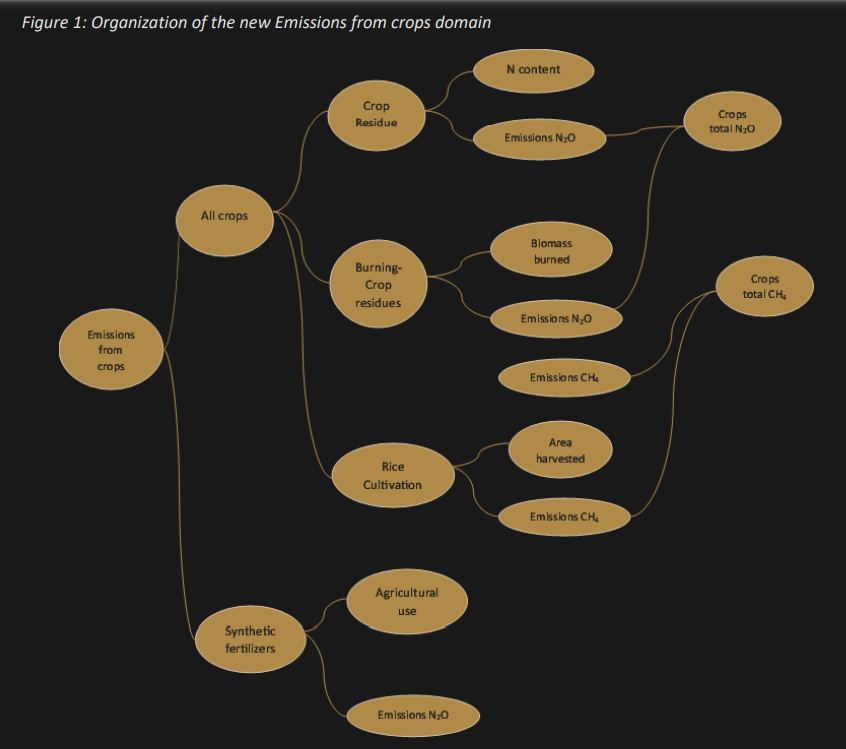

*Basicamente se supone que podemos usar esa sola columna:
                                          'Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt' 
                      o todas por separado:
                                          'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt'
                                          'Crop_Residues_Emissions_(CO2eq)_(AR5)_kt'
                                          'Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt'
                                          'Total_Fertilizers_Emissions_CO2_kt':
                                                                            'Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt'
                                                                            'Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt'
                                                                            'Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt'
                                          


In [361]:

# CROPS
suma_cultivo_arroz = df['Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt'].sum()
#suma_suelos_agricolas = df['Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_residuos = df['Crop_Residues_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_quema_residuos = df['Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_fertilizantes_total= df['Total_Fertilizers_Emissions_CO2_kt'].sum()
#suma_suelos_organicos_CO2 = df['Cropland_organic_soils_Emissions_(CO2)_kt'].sum()
#suma_suelos_organicos_N2O = df['Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt'].sum()

suma_total_crops = (
    suma_cultivo_arroz +
    #suma_suelos_agricolas +
    suma_residuos +
    
    suma_quema_residuos +
    suma_fertilizantes_total
    #suma_suelos_organicos_CO2 +
    #suma_suelos_organicos_N2O
)

suma_crops_objetivo = df['Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt'].sum()

print("CROPS")
print("Suma de Cultivo de Arroz:", formatear_numero(suma_cultivo_arroz))
#print("Suma de Suelos Agrícolas:", formatear_numero(suma_suelos_agricolas))
print("Suma de residuos:", formatear_numero(suma_residuos))
print("Suma de Quema de Residuos:", formatear_numero(suma_quema_residuos))
print("Suma de Fertilizantes:", formatear_numero(suma_fertilizantes_total))
#print("Suma de Suelos Orgánicos (CO2):", formatear_numero(suma_suelos_organicos_CO2))
#print("Suma de Suelos Orgánicos (N2O):", formatear_numero(suma_suelos_organicos_N2O))
comparar_sumas(suma_total_crops, suma_crops_objetivo, "CROPS")


CROPS
Suma de Cultivo de Arroz: 159,440,797.02
Suma de residuos: 47,227,591.25
Suma de Quema de Residuos: 9,006,258.68
Suma de Fertilizantes: 216,390,982.35
Suma Total de las Columnas (CROPS): 432,065,629.31
Suma de la Columna Objetivo (CROPS): 198,444,604.09
La suma total de las columnas es mayor que la columna objetivo por 233,621,025.22.



## Livestock

*En la literatura, y despúes de unos cambios en el 2023, FAO indica que tiene solo 4 categorias: Fermentacion enterica, manure management, manure applied to soils and manure left on pasture* (https://openknowledge.fao.org/server/api/core/bitstreams/487c7f4e-91ff-4d23-b1e4-f72dd867e939/content)

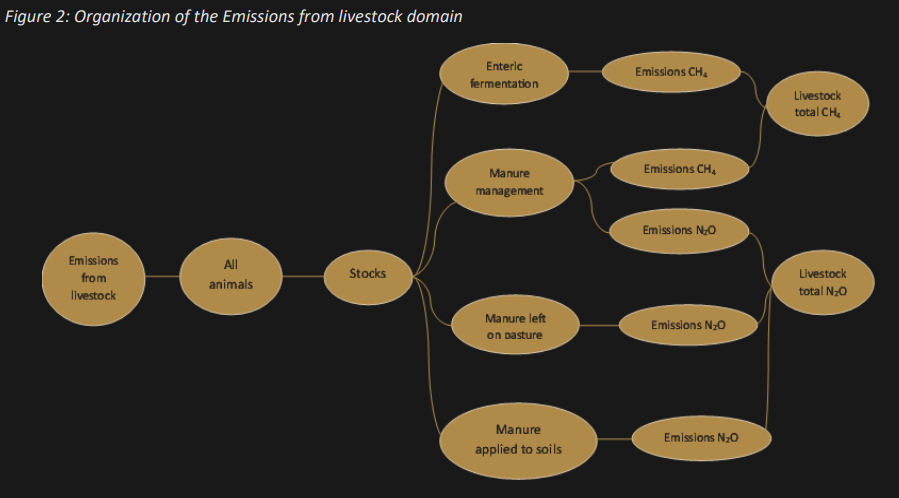

In [365]:
suma_estiercol = df['Total_manure_Emissions_CO2_kt'].sum()
suma_fermentacion_enterica = df['Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt'].sum()

suma_total_livestock = (
       suma_estiercol +
    suma_fermentacion_enterica 
    
)

suma_livestock_objetivo = df['Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt'].sum()

print("LIVESTOCK")

print("Suma de Estiércol:", formatear_numero(suma_estiercol))
print("Suma de Fermentación Entérica:", formatear_numero(suma_fermentacion_enterica))

comparar_sumas(suma_total_livestock, suma_livestock_objetivo, "LIVESTOCK")



LIVESTOCK
Suma de Estiércol: 2,924,434,641.91
Suma de Fermentación Entérica: 771,691,877.58
Suma Total de las Columnas (LIVESTOCK): 3,696,126,519.48
Suma de la Columna Objetivo (LIVESTOCK): 960,271,563.56
La suma total de las columnas es mayor que la columna objetivo por 2,735,854,955.93.



## Supply Chain

*Indagando en FAOSTAT, tiene varias categorias incluidas, depende de donde se lea (https://files-faostat.fao.org/production/GPP/README_Methodological_Note.pdf). Aquí agrego las que considero importantes, y todo se puede englobar bajo pre and post production, aunque la suma de las columnas no sean correctas*

In [405]:
# SUPPLY CHAIN
suma_consumo_hogar = df['Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_empaquetado = df['Food_Packaging_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_procesamiento = df['Food_Processing_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_retail = df['Food_Retail_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_transporte = df['Food_Transport_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_desechos = df['Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x'].sum()
suma_fabricacion_fertilizantes = df['Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_fabricacion_pesticidas = df['Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt'].sum()
suma_residuos_solidos = df['Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt'].sum()


 #      'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x',


#Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x
suma_total_supply_chain = (
    suma_consumo_hogar +
    suma_empaquetado +
    suma_procesamiento +
    suma_retail +
    suma_transporte +
    suma_desechos +
    suma_fabricacion_fertilizantes +
    suma_fabricacion_pesticidas +
    suma_residuos_solidos
)

suma_supply_chain_objetivo = df['Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'].sum()

print("SUPPLY CHAIN")
print("Suma de Consumo en Hogar:", formatear_numero(suma_consumo_hogar))
print("Suma de Empaquetado:", formatear_numero(suma_empaquetado))
print("Suma de Procesamiento:", formatear_numero(suma_procesamiento))
print("Suma de Retail:", formatear_numero(suma_retail))
print("Suma de Transporte:", formatear_numero(suma_transporte))
print("Suma de Desechos:", formatear_numero(suma_desechos))
print("Suma de Fabricación de Fertilizantes:", formatear_numero(suma_fabricacion_fertilizantes))
print("Suma de Fabricación de Pesticidas:", formatear_numero(suma_fabricacion_pesticidas))
print("Suma de Residuos Solídos:", formatear_numero(suma_residuos_solidos))
comparar_sumas(suma_total_supply_chain, suma_supply_chain_objetivo, "SUPPLY CHAIN")


SUPPLY CHAIN
Suma de Consumo en Hogar: 183,099,819.89
Suma de Empaquetado: 57,750,324.06
Suma de Procesamiento: 139,470,353.07
Suma de Retail: 100,683,093.40
Suma de Transporte: 104,859,401.85
Suma de Desechos: 283,198,601.73
Suma de Fabricación de Fertilizantes: 67,043,101.96
Suma de Fabricación de Pesticidas: 16,061,166.41
Suma de Residuos Solídos: 175,116,980.88
Suma Total de las Columnas (SUPPLY CHAIN): 1,127,282,843.24
Suma de la Columna Objetivo (SUPPLY CHAIN): 951,958,608.45
La suma total de las columnas es mayor que la columna objetivo por 175,324,234.79.



## Graficamos las 4 categorias

In [406]:

# Crear un DataFrame con las sumas
data = {
    'Category': [
        
        'Land use',
        'Crops', 
        'Livestock', 
        'Supply chain'

    ],
    'Value': [
        
       suma_total_land_use,
       suma_total_crops,
       suma_total_livestock,
       suma_total_supply_chain
    ]
}

df_4categorias = pd.DataFrame(data)
print(df_4categorias)


       Category         Value
0      Land use  2.603099e+09
1         Crops  4.320656e+08
2     Livestock  3.696127e+09
3  Supply chain  1.127283e+09


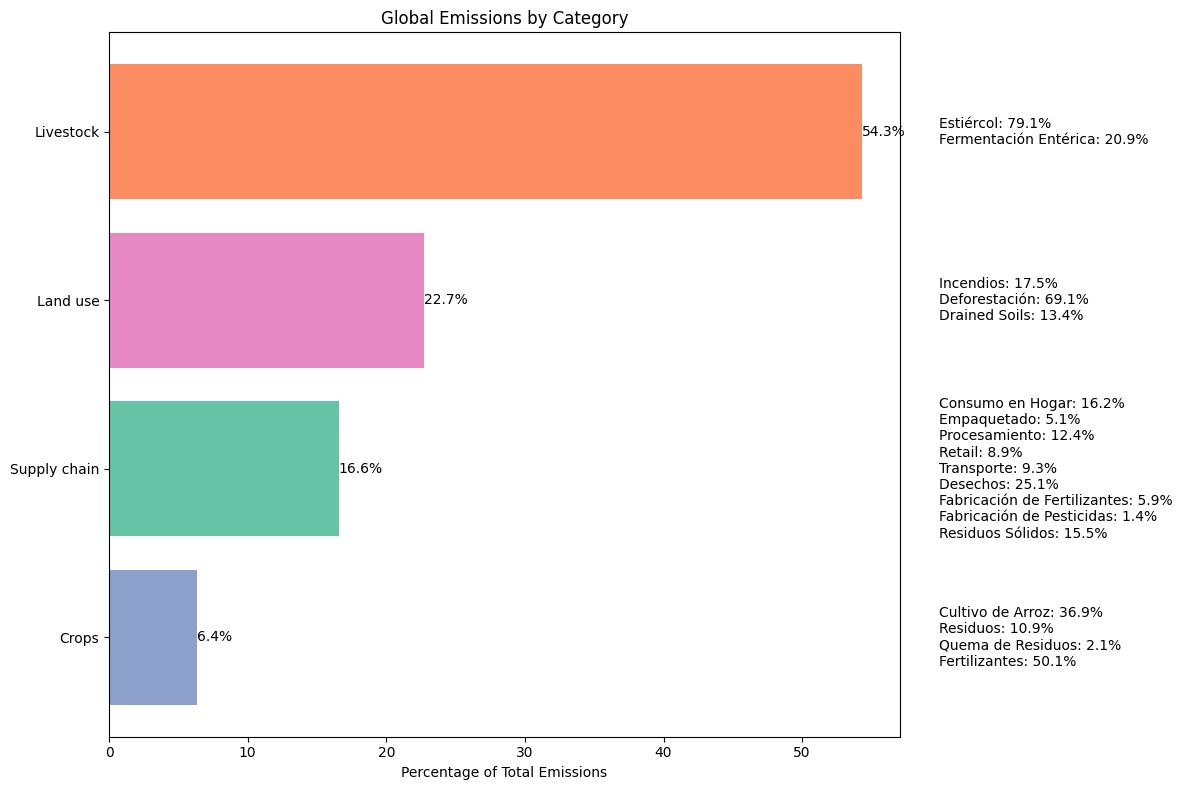

In [498]:
# Sumas totales para cada categoría
suma_total_land_use = (
    suma_incendios +
    suma_deforestacion +
    suma_drained_soils
)

suma_total_crops = (
    suma_cultivo_arroz +
    suma_residuos +
    suma_quema_residuos +
    suma_fertilizantes_total
)

suma_total_livestock = (
    suma_estiercol +
    suma_fermentacion_enterica
)

suma_total_supply_chain = (
    suma_consumo_hogar +
    suma_empaquetado +
    suma_procesamiento +
    suma_retail +
    suma_transporte +
    suma_desechos +
    suma_fabricacion_fertilizantes +
    suma_fabricacion_pesticidas +
    suma_residuos_solidos
)

# Calcular los porcentajes para cada subcategoría dentro de su categoría
land_use_percentages = {
    'Incendios': suma_incendios / suma_total_land_use * 100,
    'Deforestación': suma_deforestacion / suma_total_land_use * 100,
    'Drained Soils': suma_drained_soils / suma_total_land_use * 100
}

crops_percentages = {
    'Cultivo de Arroz': suma_cultivo_arroz / suma_total_crops * 100,
    'Residuos': suma_residuos / suma_total_crops * 100,
    'Quema de Residuos': suma_quema_residuos / suma_total_crops * 100,
    'Fertilizantes': suma_fertilizantes_total / suma_total_crops * 100
}

livestock_percentages = {
    'Estiércol': suma_estiercol / suma_total_livestock * 100,
    'Fermentación Entérica': suma_fermentacion_enterica / suma_total_livestock * 100
}

supply_chain_percentages = {
    'Consumo en Hogar': suma_consumo_hogar / suma_total_supply_chain * 100,
    'Empaquetado': suma_empaquetado / suma_total_supply_chain * 100,
    'Procesamiento': suma_procesamiento / suma_total_supply_chain * 100,
    'Retail': suma_retail / suma_total_supply_chain * 100,
    'Transporte': suma_transporte / suma_total_supply_chain * 100,
    'Desechos': suma_desechos / suma_total_supply_chain * 100,
    'Fabricación de Fertilizantes': suma_fabricacion_fertilizantes / suma_total_supply_chain * 100,
    'Fabricación de Pesticidas': suma_fabricacion_pesticidas / suma_total_supply_chain * 100,
    'Residuos Sólidos': suma_residuos_solidos / suma_total_supply_chain * 100
}

# Crear el DataFrame
data = {
    'Category': [
        'Land use',
        'Crops',
        'Livestock',
        'Supply chain'
    ],
    'Value': [
        suma_total_land_use,
        suma_total_crops,
        suma_total_livestock,
        suma_total_supply_chain
    ]
}

df_4categorias = pd.DataFrame(data)

# Calcular los porcentajes
total_value = sum(df_4categorias['Value'])
df_4categorias['Percentage'] = df_4categorias['Value'] / total_value * 100

# Ordenar el DataFrame de mayor a menor
df_4categorias = df_4categorias.sort_values(by='Percentage', ascending=False)

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#fc8d62', '#e78ac3', '#66c2a5', '#8da0cb']
bars = ax.barh(df_4categorias['Category'], df_4categorias['Percentage'], color=colors)

# Añadir anotaciones dentro de las barras
for index, bar in enumerate(bars):
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    percentage = df_4categorias['Percentage'].iloc[index]
    ax.text(width, label_y, f'{percentage:.1f}%', va='center', ha='left')

    # Añadir anotaciones de las subcategorías
    if df_4categorias['Category'].iloc[index] == 'Land use':
        subcategories_text = '\n'.join([f'{k}: {v:.1f}%' for k, v in land_use_percentages.items()])
    elif df_4categorias['Category'].iloc[index] == 'Crops':
        subcategories_text = '\n'.join([f'{k}: {v:.1f}%' for k, v in crops_percentages.items()])
    elif df_4categorias['Category'].iloc[index] == 'Livestock':
        subcategories_text = '\n'.join([f'{k}: {v:.1f}%' for k, v in livestock_percentages.items()])
    elif df_4categorias['Category'].iloc[index] == 'Supply chain':
        subcategories_text = '\n'.join([f'{k}: {v:.1f}%' for k, v in supply_chain_percentages.items()])
    
    ax.text(1.05, label_y, subcategories_text, transform=ax.get_yaxis_transform(), fontsize=10, verticalalignment='center')



ax.set_xlabel('Percentage of Total Emissions')
ax.set_title('Global Emissions by Category')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


## Sankey Diagram

In [532]:
numeros= [suma_incendios, suma_deforestacion, suma_drained_soils,

 suma_cultivo_arroz, suma_residuos, suma_quema_residuos, suma_fertilizantes_total, #suma_suelos_organicos_CO2, suma_suelos_organicos_N2O,

suma_estiercol, suma_fermentacion_enterica,

 suma_consumo_hogar, suma_empaquetado, suma_procesamiento, suma_retail, suma_transporte, suma_desechos, suma_fabricacion_fertilizantes, suma_fabricacion_pesticidas, suma_residuos_solidos
]
print(numeros)

[270306949.0511, 1069739495.9767, 207321866.91930002, 159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, 2924434641.9072995, 771691877.5774, 183099819.888121, 57750324.060229, 139470353.069733, 100683093.401512, 104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735]


In [534]:
import plotly.graph_objects as go

# Definir los nodos y los links
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = [
            'Agrifood systems emissions', 'Other industry emissions',
            'Livestock', 'Land use', 'Supply chain', 'Crops',
            'Incendios', 'Deforestación', 'Drained Soils', 'Fertilizantes',
            'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Estiércol',
            'Fermentación Entérica', 'Desechos', 'Consumo en Hogar',
            'Residuos Sólidos', 'Procesamiento', 'Retail', 'Transporte',
            'Empaquetado', 'Fabricación de Fertilizantes',
            'Fabricación de Pesticidas'
        ],
        color = [
            'green', 'gray',
            'orange', 'blue', 'purple', 'red',
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush', 
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue'
        ]
    ),
    link = dict(
        source = [
            0, 0, 0, 0,  # Agrifood systems emissions to Livestock, Land use, Supply chain, Crops
            #1,           # Other industry emissions is no longer connected to anything
            2, 2,        # Livestock to Estiércol, Fermentación Entérica
            3, 3, 3,     # Land use to Incendios, Deforestación, Drained Soils
            4, 4, 4,     # Supply chain to Desechos, Consumo en Hogar, Residuos Sólidos, etc.
            5, 5,        # Crops to Cultivo de Arroz, Fertilizantes, etc.
        ],
        target = [
            2, 3, 4, 5,  # Connections from Agrifood systems emissions
            # None for Other industry emissions
            13, 14,      # Livestock to Estiércol, Fermentación Entérica
            6, 7, 8,     # Land use to Incendios, Deforestación, Drained Soils
            15, 16, 17,  # Supply chain to Desechos, Consumo en Hogar, Residuos Sólidos
            9, 10,       # Crops to Cultivo de Arroz, Fertilizantes
        ],
        value = [
            7.7, 3.2, 2.1, 0.8,  # Valores reales en gigatoneladas de CO2e para cada sector
            1.5, 6.2,           # Livestock to Estiércol, Fermentación Entérica
            1.0, 1.7, 0.5,      # Land use to Incendios, Deforestación, Drained Soils
            0.5, 0.8, 0.8,      # Supply chain to Desechos, Consumo en Hogar, Residuos Sólidos
            0.4, 0.4            # Crops to Cultivo de Arroz, Fertilizantes
        ],
        color = [
            'orange', 'blue', 'purple', 'red',  # Colors for the main links
            'orange', 'orange',  # Livestock to its subcategories
            'blue', 'blue', 'blue',  # Land use to its subcategories
            'purple', 'purple', 'purple',  # Supply chain to its subcategories
            'red', 'red'  # Crops to its subcategories
        ]
    ))])

fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [535]:
import plotly.graph_objects as go

# Nombres de los nodos y color
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions', # Grupos principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',         # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 'Fertilizantes',
    'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Estiércol',
    'Fermentación Entérica', 'Desechos', 'Consumo en Hogar',
    'Residuos Sólidos', 'Procesamiento', 'Retail', 'Transporte',
    'Empaquetado', 'Fabricación de Fertilizantes',
    'Fabricación de Pesticidas'
]

# Valores de los links entre nodos originales
valores_links = [
    270306949.0511, 1069739495.9767, 207321866.91930002, 159440797.02,  # Land use -> Incendios, Deforestación, Drained Soils, Fertilizantes
    47227591.25179999, 9006258.6839, 216390982.351899,  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    57750324.060229, 139470353.069733, 100683093.401512, 104859401.849287, 283198601.72885704,  # Supply chain -> Procesamiento, Retail, etc.
    67043101.956627995, 16061166.406770999, 175116980.882735  # Otros valores de la Supply chain
]

# Crear la figura del Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nombres_nodos,
        color = [
            'green', 'gray', # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',         # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush', 
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue' # Colores variados
        ]
    ),
    link = dict(
        source = [
            0, 0, 0, 0,  # Agrifood systems emissions to Livestock, Land use, Supply chain, Crops
            2, 2,        # Livestock to Estiércol, Fermentación Entérica
            3, 3, 3,     # Land use to Incendios, Deforestación, Drained Soils
            4, 4, 4,     # Supply chain to Desechos, Consumo en Hogar, Residuos Sólidos, etc.
            5, 5         # Crops to Cultivo de Arroz, Fertilizantes, etc.
        ],
        target = [
            2, 3, 4, 5,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14,      # Livestock -> Estiércol, Fermentación Entérica
            6, 7, 8,     # Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17,  # Supply chain -> Desechos, Consumo en Hogar, Residuos Sólidos
            9, 10        # Crops -> Cultivo de Arroz, Fertilizantes
        ],
        value = valores_links,
        color = [
            'orange', 'blue', 'purple', 'red',  # Colores para los links principales
            'orange', 'orange',  # Livestock a sus subcategorías
            'blue', 'blue', 'blue',  # Land use a sus subcategorías
            'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [537]:
import plotly.graph_objects as go

# Nombres de los nodos y color
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions', # Grupos principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',         # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 'Cultivo de Arroz', 
    'Residuos', 'Quema de Residuos', 'Fertilizantes', 
    'Estiércol', 'Fermentación Entérica', 
    'Consumo en Hogar', 'Empaquetado', 'Procesamiento', 'Retail', 
    'Transporte', 'Desechos', 'Fabricación de Fertilizantes',
    'Fabricación de Pesticidas', 'Residuos Sólidos'
]

# Valores de los links entre nodos usando los números que proporcionaste
valores_links = [
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    270306949.0511, 1069739495.9767, 207321866.91930002,  # Land use -> Incendios, Deforestación, Drained Soils
    159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
    57750324.060229, 139470353.069733, 100683093.401512,  # Supply chain -> Procesamiento, Retail, etc.
    104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735  # Supply chain -> Transporte, Empaquetado, etc.
]

# Crear la figura del Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nombres_nodos,
        color = [
            'green', 'gray', # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',         # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush', 
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue' # Colores variados
        ]
    ),
    link = dict(
        source = [
            0, 0, 0,  # Agrifood systems emissions a Livestock, Land use, Supply chain
            2, 2, 3, 3, 3,  # Livestock a sus subcategorías, Land use a sus subcategorías
            4, 4, 4, 4,  # Supply chain a sus subcategorías
            5, 5, 5, 5,  # Crops a sus subcategorías
        ],
        target = [
            2, 3, 4,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14, 6, 7, 8,  # Livestock -> Estiércol, Fermentación Entérica, Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17, 18,  # Supply chain -> Procesamiento, Retail, etc.
            9, 10, 11, 12,  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        value = valores_links,
        color = [
            'green', 'green', 'green',  # Colores para los links principales de Agrifood systems emissions
            'orange', 'orange', 'blue', 'blue', 'blue',  # Livestock a sus subcategorías, Land use a sus subcategorías
            'purple', 'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red', 'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [538]:
import plotly.graph_objects as go

# Definir los nombres de los nodos
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions',  # Emisiones principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',          # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 
    'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Fertilizantes', 
    'Estiércol', 'Fermentación Entérica', 
    'Consumo en Hogar', 'Empaquetado', 'Procesamiento', 
    'Retail', 'Transporte', 'Desechos', 
    'Fabricación de Fertilizantes', 'Fabricación de Pesticidas', 'Residuos Sólidos'
]

# Valores de los links entre nodos usando los números que proporcionaste
valores_links = [
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    270306949.0511, 1069739495.9767, 207321866.91930002,  # Land use -> Incendios, Deforestación, Drained Soils
    159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
    57750324.060229, 139470353.069733, 100683093.401512,  # Supply chain -> Procesamiento, Retail, etc.
    104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735  # Supply chain -> Transporte, Empaquetado, etc.
]

# Crear la figura del Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nombres_nodos,
        color=[
            'green', 'gray',  # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',  # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush',
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue'  # Colores variados
        ]
    ),
    link=dict(
        source=[
            0, 0, 0, 0,  # Agrifood systems emissions a Livestock, Land use, Supply chain, Crops
            2, 2, 3, 3, 3,  # Livestock a Estiércol, Fermentación Entérica, Land use a Incendios, Deforestación, Drained Soils
            4, 4, 4, 4,  # Supply chain a Procesamiento, Retail, etc.
            5, 5, 5, 5  # Crops a Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        target=[
            2, 3, 4, 5,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14, 6, 7, 8,  # Livestock -> Estiércol, Fermentación Entérica, Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17, 18,  # Supply chain -> Procesamiento, Retail, etc.
            9, 10, 11, 12  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        value=valores_links,
        color=[
            'green', 'green', 'green', 'green',  # Colores para los links principales de Agrifood systems emissions
            'orange', 'orange', 'blue', 'blue', 'blue',  # Livestock a sus subcategorías, Land use a sus subcategorías
            'purple', 'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red', 'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [539]:
import plotly.graph_objects as go

# Definir los nombres de los nodos
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions',  # Emisiones principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',          # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 
    'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Fertilizantes', 
    'Estiércol', 'Fermentación Entérica', 
    'Consumo en Hogar', 'Empaquetado', 'Procesamiento', 
    'Retail', 'Transporte', 'Desechos', 
    'Fabricación de Fertilizantes', 'Fabricación de Pesticidas', 'Residuos Sólidos'
]

# Valores de los links entre nodos usando los números que proporcionaste
valores_links = [
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    270306949.0511, 1069739495.9767, 207321866.91930002,  # Land use -> Incendios, Deforestación, Drained Soils
    159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
    57750324.060229, 139470353.069733, 100683093.401512,  # Supply chain -> Procesamiento, Retail, etc.
    104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735  # Supply chain -> Transporte, Empaquetado, etc.
]

# Crear la figura del Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nombres_nodos,
        color=[
            'green', 'gray',  # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',  # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush',
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue'  # Colores variados
        ]
    ),
    link=dict(
        source=[
            0, 0, 0, 0,  # Agrifood systems emissions a Livestock, Land use, Supply chain, Crops
            2, 2, 3, 3, 3,  # Livestock a Estiércol, Fermentación Entérica, Land use a Incendios, Deforestación, Drained Soils
            4, 4, 4, 4,  # Supply chain a Procesamiento, Retail, etc.
            5, 5, 5, 5  # Crops a Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        target=[
            2, 3, 4, 5,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14, 6, 7, 8,  # Livestock -> Estiércol, Fermentación Entérica, Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17, 18,  # Supply chain -> Procesamiento, Retail, etc.
            9, 10, 11, 12  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        value=valores_links,
        color=[
            'green', 'green', 'green', 'green',  # Colores para los links principales de Agrifood systems emissions
            'orange', 'orange', 'blue', 'blue', 'blue',  # Livestock a sus subcategorías, Land use a sus subcategorías
            'purple', 'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red', 'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [540]:
import plotly.graph_objects as go

# Definir los nombres de los nodos
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions',  # Emisiones principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',          # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 
    'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Fertilizantes', 
    'Estiércol', 'Fermentación Entérica', 
    'Consumo en Hogar', 'Empaquetado', 'Procesamiento', 
    'Retail', 'Transporte', 'Desechos', 
    'Fabricación de Fertilizantes', 'Fabricación de Pesticidas', 'Residuos Sólidos'
]

# Valores de los links entre nodos usando los números que proporcionaste
valores_links = [
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    270306949.0511, 1069739495.9767, 207321866.91930002,  # Land use -> Incendios, Deforestación, Drained Soils
    159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
    57750324.060229, 139470353.069733, 100683093.401512,  # Supply chain -> Procesamiento, Retail, etc.
    104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735  # Supply chain -> Transporte, Empaquetado, etc.
]

# Crear la figura del Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nombres_nodos,
        color=[
            'green', 'gray',  # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',  # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush',
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue'  # Colores variados
        ]
    ),
    link=dict(
        source=[
            0, 0, 0, 0,  # Agrifood systems emissions a Livestock, Land use, Supply chain, Crops
            2, 2, 3, 3, 3,  # Livestock a Estiércol, Fermentación Entérica, Land use a Incendios, Deforestación, Drained Soils
            4, 4, 4, 4,  # Supply chain a Procesamiento, Retail, etc.
            5, 5, 5, 5  # Crops a Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        target=[
            2, 3, 4, 5,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14, 6, 7, 8,  # Livestock -> Estiércol, Fermentación Entérica, Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17, 18,  # Supply chain -> Procesamiento, Retail, etc.
            9, 10, 11, 12  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        value=valores_links,
        color=[
            'green', 'green', 'green', 'green',  # Colores para los links principales de Agrifood systems emissions
            'orange', 'orange', 'blue', 'blue', 'blue',  # Livestock a sus subcategorías, Land use a sus subcategorías
            'purple', 'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red', 'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()


In [541]:
import plotly.graph_objects as go

# Definir los nombres de los nodos, incluidos los nuevos cambios solicitados
nombres_nodos = [
    'Agrifood systems emissions', 'Other industry emissions',  # Nodos principales
    'Livestock', 'Land use', 'Supply chain', 'Crops',          # Subcategorías de Agrifood
    'Incendios', 'Deforestación', 'Drained Soils', 
    'Cultivo de Arroz', 'Residuos', 'Quema de Residuos', 'Fertilizantes', 
    'Estiércol', 'Fermentación Entérica', 
    'Consumo en Hogar', 'Empaquetado', 'Procesamiento', 
    'Retail', 'Transporte', 'Desechos', 
    'Fabricación de Fertilizantes', 'Fabricación de Pesticidas', 'Residuos Sólidos'
]

# Valores de los enlaces entre nodos
valores_links = [
    2924434641.9072995, 771691877.5774, 183099819.888121,  # Livestock -> Estiércol, Fermentación Entérica
    270306949.0511, 1069739495.9767, 207321866.91930002,  # Land use -> Incendios, Deforestación, Drained Soils
    159440797.02, 47227591.25179999, 9006258.6839, 216390982.351899, # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
    57750324.060229, 139470353.069733, 100683093.401512,  # Supply chain -> Procesamiento, Retail, etc.
    104859401.849287, 283198601.72885704, 67043101.956627995, 16061166.406770999, 175116980.882735  # Supply chain -> Transporte, Empaquetado, etc.
]

# Crear la figura del Sankey diagram con los nodos y enlaces correctos
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nombres_nodos,
        color=[
            'green', 'gray',  # Colores principales para Agrifood y otras industrias
            'orange', 'blue', 'purple', 'red',  # Colores de los nodos para subcategorías de Agrifood
            'lightblue', 'lightgreen', 'lightyellow', 'lightpink',
            'lightcyan', 'lightcoral', 'lightgoldenrodyellow', 'lightgray',
            'lightsteelblue', 'lavender', 'lavenderblush',
            'lemonchiffon', 'lightseagreen', 'lightsalmon', 'lightcoral',
            'lightgreen', 'lightskyblue'  # Colores variados
        ]
    ),
    link=dict(
        source=[
            0, 0, 0, 0,  # Agrifood systems emissions a Livestock, Land use, Supply chain, Crops
            2, 2, 3, 3, 3,  # Livestock a Estiércol, Fermentación Entérica, Land use a Incendios, Deforestación, Drained Soils
            4, 4, 4, 4,  # Supply chain a Procesamiento, Retail, etc.
            5, 5, 5, 5  # Crops a Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        target=[
            2, 3, 4, 5,  # Conexiones de Agrifood systems emissions a subcategorías
            13, 14, 6, 7, 8,  # Livestock -> Estiércol, Fermentación Entérica, Land use -> Incendios, Deforestación, Drained Soils
            15, 16, 17, 18,  # Supply chain -> Procesamiento, Retail, etc.
            9, 10, 11, 12  # Crops -> Cultivo de Arroz, Residuos, Quema de Residuos, Fertilizantes
        ],
        value=valores_links,
        color=[
            'green', 'green', 'green', 'green',  # Colores para los links principales de Agrifood systems emissions
            'orange', 'orange', 'blue', 'blue', 'blue',  # Livestock a sus subcategorías, Land use a sus subcategorías
            'purple', 'purple', 'purple', 'purple',  # Supply chain a sus subcategorías
            'red', 'red', 'red', 'red'  # Crops a sus subcategorías
        ]
    ))])

# Configuración del layout
fig.update_layout(
    title_text="Agrifood Systems Emissions and Other Industry Emissions",
    font_size=10
)

fig.show()
